# Medical Cost Personal Insurance Project

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
data_insur=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data_insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
data_insur.shape

(1338, 7)

This database contains 1338 rows and 7 columns.

In [4]:
#getting the information from the dataset
data_insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we can see there are no null values present in the dataset.

In [5]:
#Checking the types of columns
data_insur.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We can see there are 3 different types of data (int,folat and object) present in the database

In [6]:
# checking for the missing values
data_insur.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see there are no missing values present in the dataset.

#### Separating numerical and categorical columns

In [7]:
#Checking for numerical columns
num_col=[]
for i in data_insur.dtypes.index:
    if data_insur.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:", num_col)

#Checking for categorical columns
cat_col=[]
for i in data_insur.dtypes.index:
    if data_insur.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Numerical Columns: ['age', 'bmi', 'children', 'charges']
Categorical Columns: ['sex', 'smoker', 'region']


#### Statistical analysis of the Numerical data

In [8]:
data_insur.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The summary of the dataset looks perfect since there is no negative/invalid values present in it.
the observations we make from the above are as follows:--
1. The counts of all the columns are same i.e,1338 which means there are no missing values present in it.
2. we observe that there is a huge difference between the 75% and max of bmi column,so there may be outliers present in it.

As 'charges' is our target column, ignoring it for now.

### Visualization

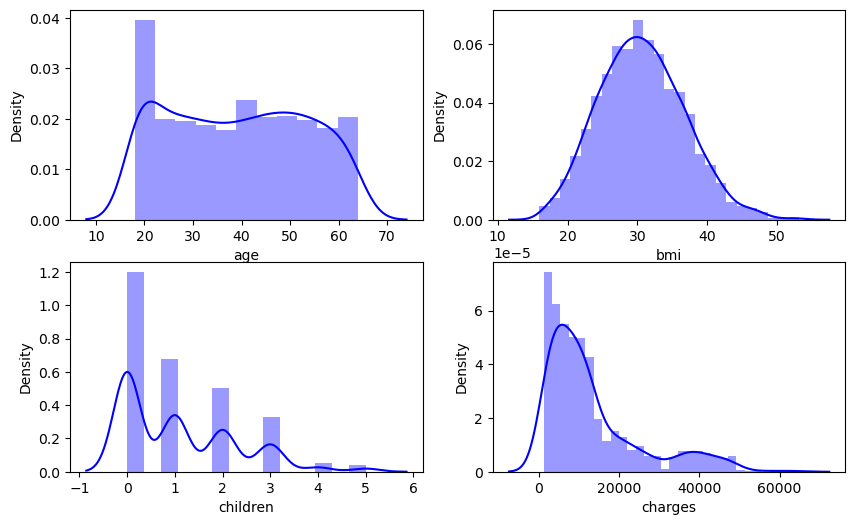

In [9]:
#visualization of data distribution for numerical column
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data_insur[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plots, we can see that the data looks quite normal for all the columns except the BMI column which seems to have outliers in it like earlier in describe summary. so we do the boxplot for further analysis.

<AxesSubplot:>

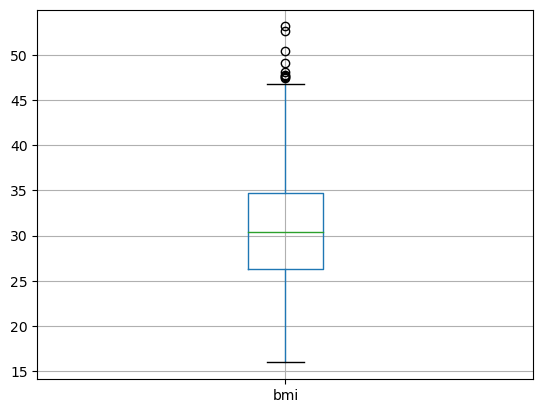

In [10]:
#Visualizing the outliers for 'bmi' column using boxplot
data_insur.boxplot(column=["bmi"])

Here by observing the boxplot we can conclude that there are outliers present in 'bmi' feature.

In [11]:
#Finding the IQR(Inter Quartile Range) to identify Outliers.
q1 = data_insur.quantile(0.25) #1st quantile
q3 = data_insur.quantile(0.75) #3rd quantile

iqr = q3 - q1   #Inter quantile range

#Outlier detection Formula
#higher_side = Q1 + 1.5 * IQR
#lower_side = Q3 - 1.5 * IQR


In [12]:
bmi_high=(q3.bmi+(1.5*iqr.bmi))
bmi_high

47.290000000000006

From above point,anything above this we treat as outliers

In [13]:
#extracting the indexes which have higher values
np_index=np.where(data_insur['bmi']>bmi_high)
np_index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

It is observed that there are 9 outliers in the bmi feature.

In [14]:
#Dropping the indexes which we found above 
data_insur=data_insur.drop(data_insur.index[np_index])
data_insur.shape

(1329, 7)

From above we can see that the 9 rows belong to outliers are removed from the dataset as earlier the dimension was (1338, 7).

### Data Analysis by Visualization of Categorical column

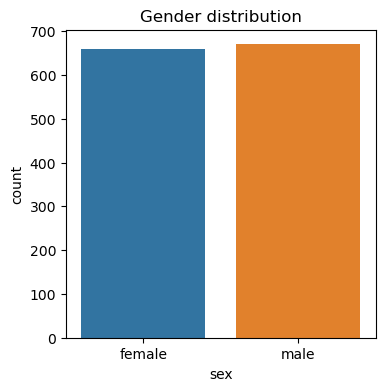

male      670
female    659
Name: sex, dtype: int64


In [15]:
#Visualizing the gender Distribution
plt.figure(figsize=(4,4))
ax=sns.countplot(x='sex',data=data_insur)
plt.title('Gender distribution')
plt.show()
print(data_insur['sex'].value_counts())

From the plot we can observe the male and female counts are almost close to each other.

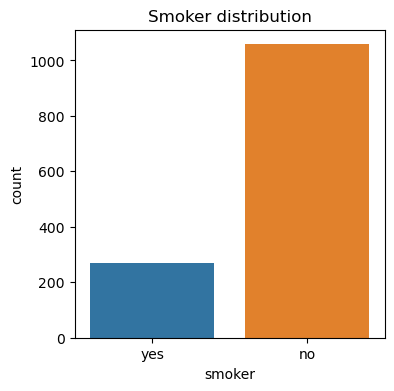

no     1058
yes     271
Name: smoker, dtype: int64


In [16]:
#Visualizing the smoker count
plt.figure(figsize=(4,4))
ax=sns.countplot(x='smoker',data=data_insur)
plt.title('Smoker distribution')
plt.show()
print(data_insur['smoker'].value_counts())

Here we can observe that the count of "No smoker" are quite high compared to the "yes smoker" count.So this is a class imbalance issue in the dataset.

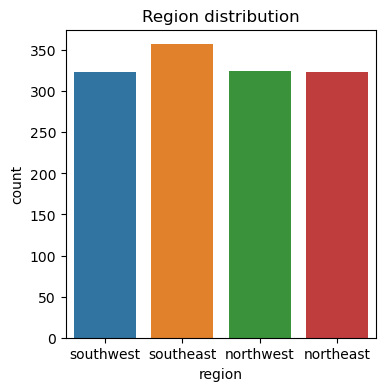

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64


In [17]:
#Visualizing the Region Distribution
plt.figure(figsize=(4,4))
ax=sns.countplot(x='region',data=data_insur)
plt.title('Region distribution')
plt.show()
print(data_insur['region'].value_counts())

From the above plot we can see the count of all the regions are very close to each other.So the distribution is balance here.

### Encoding the categorical features

In [18]:
#Encoding sex column
data_insur.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding smoker column
data_insur.replace({'smoker':{'no':0,'yes':1}},inplace=True)

#Encoding region column
data_insur.replace({'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3}},inplace=True)

In [19]:
#Displaying first 10 rows
data_insur.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,0,29.830,2,0,0,6406.41070
9,60,1,25.840,0,0,1,28923.13692


### Correlation between Features using Heatmap

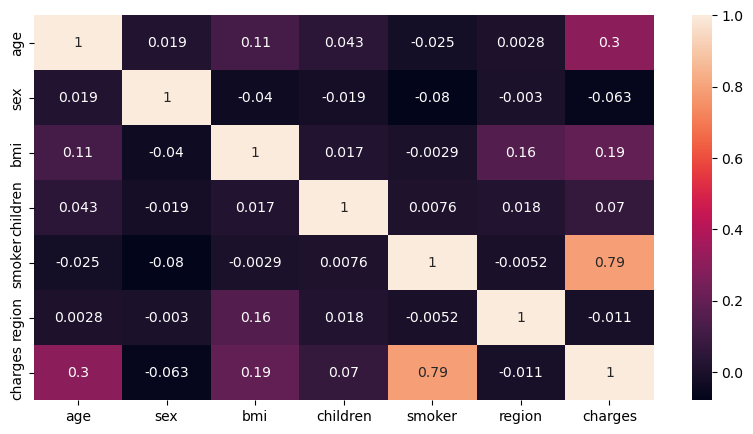

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(data_insur.corr(), annot = True)
plt.show()

From above correlation matrix, we can see the positive as well as negative correlations between the label and other features. There is no any strong relationship between features.So there is no multicolinearity issue here.
So taking all features.

#### Separating the features and target

In [22]:
x = data_insur.drop(['charges'],axis=1)
y = data_insur['charges']

#### Visualizing the relationship of features with the label/target.

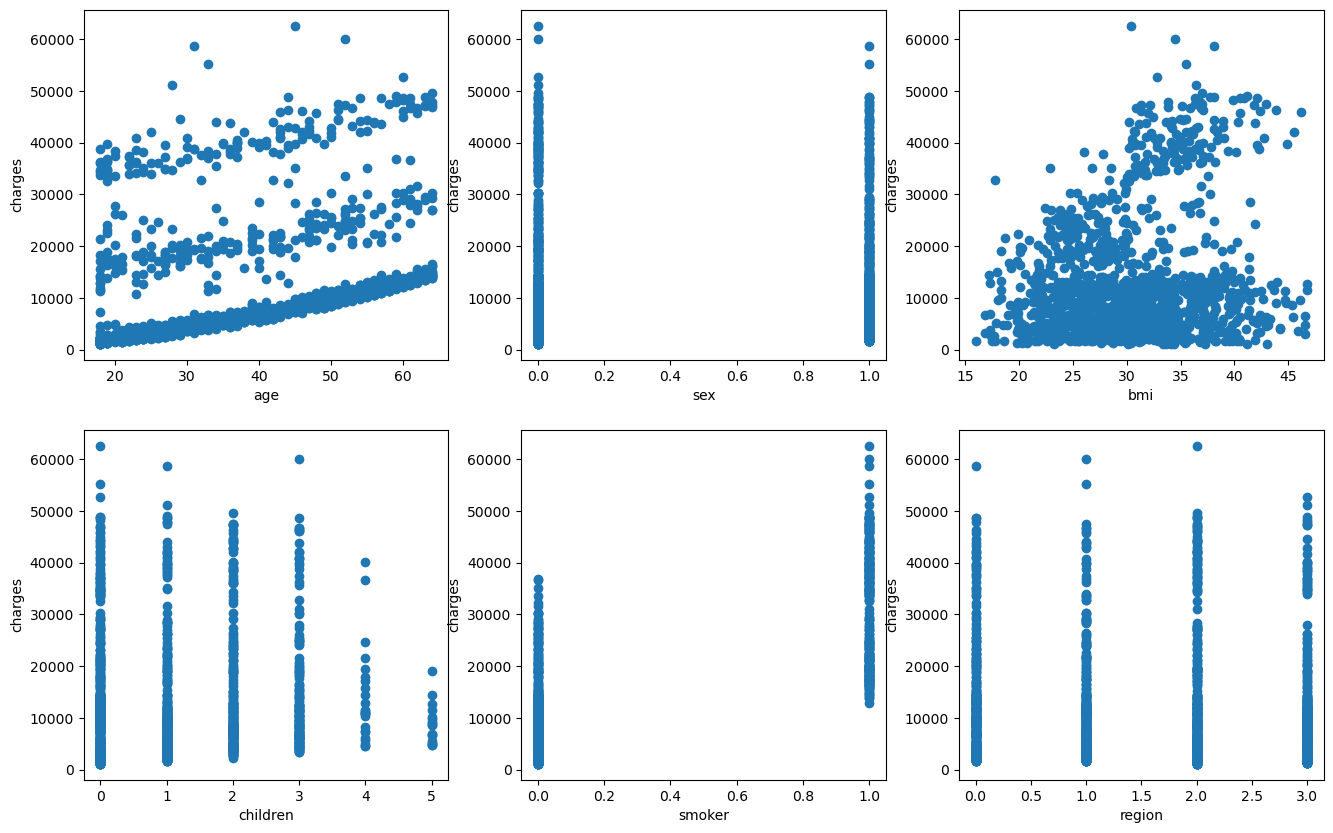

In [23]:
plt.figure(figsize=(16,10), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('charges',fontsize=10)
    plotnumber+=1
plt.show()

### Data Scaling using Standard Scaler

In [24]:
sc = StandardScaler()
x_scaled=sc.fit_transform(x)

### Splitting the data into Train and Test Set.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Regression)

### Linear Regression

In [26]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [27]:
# Model Evaluation
y_pred=model1.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :76%
R2 score(Testing Accuracy) :70%
MAE(Mean absolute Error) : 4128.30
MSE(Mean Squared Error) : 39869582.95
RMSE(Root Mean squared Error) : 64.25


### Decision Tree Regressor

In [28]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [29]:
# Model Evaluation
y_pred=model2.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :71%
MAE(Mean absolute Error) : 2821.59
MSE(Mean Squared Error) : 39056092.35
RMSE(Root Mean squared Error) : 53.12


### Random Forest Regressor

In [30]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
# Model Evaluation
y_pred=model3.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :98%
R2 score(Testing Accuracy) :82%
MAE(Mean absolute Error) : 2504.32
MSE(Mean Squared Error) : 23947824.03
RMSE(Root Mean squared Error) : 50.04


### GradientBoostingRegressor

In [32]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [33]:
# Model Evaluation
y_pred=model4.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :91%
R2 score(Testing Accuracy) :84%
MAE(Mean absolute Error) : 2458.98
MSE(Mean Squared Error) : 21819401.29
RMSE(Root Mean squared Error) : 49.59


### AdaBoostRegressor

In [36]:
model5 = AdaBoostRegressor()
model5.fit(x_train, y_train)

AdaBoostRegressor()

In [37]:
# Model Evaluation
y_pred=model5.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model5.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model5.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :84%
R2 score(Testing Accuracy) :81%
MAE(Mean absolute Error) : 3882.99
MSE(Mean Squared Error) : 25811969.22
RMSE(Root Mean squared Error) : 62.31


#### As the difference between training and testing score is minimum in AdaBoostRegressor so choosing it as our final model.

### Hyper Parameter Tuning

In [38]:
#AdaBoostRegressor model tuning using RandomizedSearchCV
parameters={'n_estimators':[45,50,60],
           'learning_rate':[0.08,0.24,0.30]}


In [39]:
rcv=RandomizedSearchCV(AdaBoostRegressor(),parameters,cv=5)

In [40]:
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.08, 0.24, 0.3],
                                        'n_estimators': [45, 50, 60]})

In [41]:
rcv.best_estimator_

AdaBoostRegressor(learning_rate=0.08, n_estimators=45)

#### Regression using tuned parameters

In [42]:
Final_model=AdaBoostRegressor(learning_rate=0.08, n_estimators=45)
Final_model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.08, n_estimators=45)

In [43]:
# Model Evaluation
y_pred=Final_model.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(Final_model.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(Final_model.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :85%
R2 score(Testing Accuracy) :82%
MAE(Mean absolute Error) : 3556.12
MSE(Mean Squared Error) : 23904571.48
RMSE(Root Mean squared Error) : 59.63


From above we can see after tuning the parameters,the accuracy score is incresed.